In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
data = pd.read_csv("appliance_usage_dataset.csv")
print(data.head())

          timestamp house_id  season festival    ac  fridge  lights  fans  \
0  01-01-2023 00:00  House_1  winter      NaN  0.25    0.59    0.42  0.38   
1  01-01-2023 01:00  House_1  winter      NaN  0.12    0.56    0.38  0.41   
2  01-01-2023 02:00  House_1  winter      NaN  0.43    0.36    0.25  0.26   
3  01-01-2023 03:00  House_1  winter      NaN  0.27    0.39    0.38  0.24   
4  01-01-2023 04:00  House_1  winter      NaN  0.28    0.54    0.26  0.35   

   washing_machine    tv  
0             0.15  0.26  
1             0.11  0.59  
2             0.19  0.41  
3             0.19  0.35  
4             0.28  0.22  


In [5]:
data['timestamp'] = pd.to_datetime(data['timestamp'],format="%d-%m-%Y %H:%M")

data['Hour'] = data['timestamp'].dt.hour
data['Day'] = data['timestamp'].dt.day
data['Month'] = data['timestamp'].dt.month
data['Year'] = data['timestamp'].dt.year


In [6]:
data['festival'] = data['festival'].fillna('No_Festival')

In [7]:
from sklearn.preprocessing import LabelEncoder
le_house = LabelEncoder()
le_season = LabelEncoder()
le_festival = LabelEncoder()
data['house_id'] = le_house.fit_transform(data['house_id'])
data['season'] = le_season.fit_transform(data['season'])
data['festival'] = le_festival.fit_transform(data['festival'])


In [8]:
X = data[['house_id','season','festival','Hour','Day','Month','Year']]
y = data['ac']   # AC consumption


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R2 Score:", r2_score(y_test, pred))

MAE: 0.12206798986486488
RMSE: 0.15024438539626447
R2 Score: 0.8317516182193598


In [12]:
future_data = pd.DataFrame({
    'house_id': [le_house.transform(['House_1'])[0]],
    'season': [le_season.transform(['summer'])[0]],
    'festival': [le_festival.transform(['No_Festival'])[0]],
    'Hour': [18],
    'Day': [10],
    'Month': [5],
    'Year': [2025]
})

future_ac = model.predict(future_data)
print("Predicted AC Consumption:", future_ac[0], "kWh")

Predicted AC Consumption: 1.0510000000000006 kWh


In [13]:
X = data[['house_id','season','festival','Hour','Day','Month','Year']]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [17]:
future_data = pd.DataFrame({
    'house_id': [le_house.transform(['House_1'])[0]],
    'season': [le_season.transform(['summer'])[0]],
    'festival': [le_festival.transform(['No_Festival'])[0]],
    'Hour': [18],
    'Day': [10],
    'Month': [5],
    'Year': [2025]
})

### Predicting Consumption for All Appliances

Now, let's iterate through each appliance, train a model specifically for its consumption, and predict its usage for the `future_data`.

In [18]:
appliance_columns = ['ac', 'fridge', 'lights', 'fans', 'washing_machine', 'tv']

for appliance in appliance_columns:
    print(f"\n--- Predicting {appliance.upper()} Consumption ---")
    y = data[appliance]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model_appliance = RandomForestRegressor(n_estimators=100, random_state=42)
    model_appliance.fit(X_train, y_train)
    future_consumption = model_appliance.predict(future_data)
    print(f"Predicted {appliance.upper()} Consumption: {future_consumption[0]:.2f} kWh")


--- Predicting AC Consumption ---
Predicted AC Consumption: 1.05 kWh

--- Predicting FRIDGE Consumption ---
Predicted FRIDGE Consumption: 0.46 kWh

--- Predicting LIGHTS Consumption ---
Predicted LIGHTS Consumption: 0.28 kWh

--- Predicting FANS Consumption ---
Predicted FANS Consumption: 0.40 kWh

--- Predicting WASHING_MACHINE Consumption ---
Predicted WASHING_MACHINE Consumption: 0.27 kWh

--- Predicting TV Consumption ---
Predicted TV Consumption: 0.26 kWh


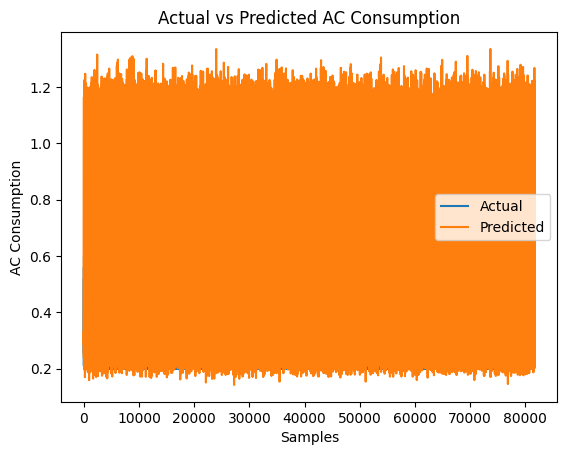

In [19]:
import matplotlib.pyplot as plt

plt.plot(y_test.values, label='Actual')
plt.plot(pred, label='Predicted')
plt.xlabel("Samples")
plt.ylabel("AC Consumption")
plt.title("Actual vs Predicted AC Consumption")
plt.legend()
plt.show()


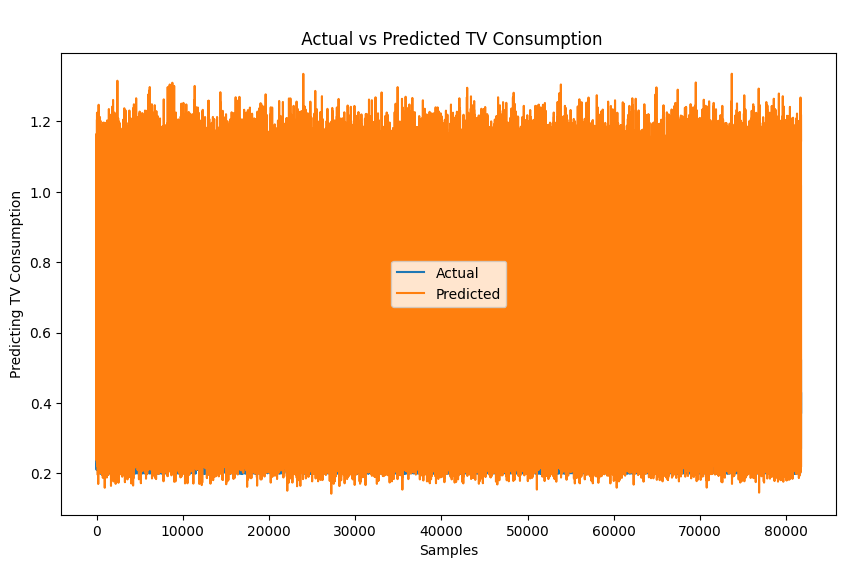

In [20]:
# Plotting actual vs predicted for the current appliance
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(pred, label='Predicted')
plt.xlabel("Samples")
plt.ylabel(f"Predicting {appliance.upper()} Consumption")
plt.title(f"\n Actual vs Predicted {appliance.upper()} Consumption")
plt.legend()
plt.show()

In [21]:
appliance_cols = ['ac','fridge','lights','fans','washing_machine','tv']

data['total_consumption'] = data[appliance_cols].sum(axis=1)


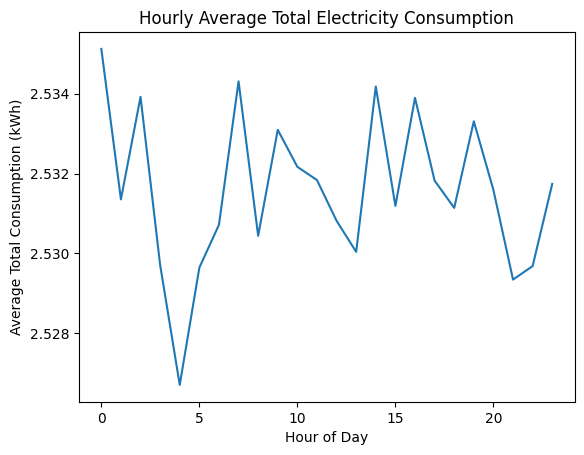

In [22]:
data['Hour'] = data['timestamp'].dt.hour

hourly_consumption = data.groupby('Hour')['total_consumption'].mean()

plt.figure()
hourly_consumption.plot(kind='line')
plt.xlabel("Hour of Day")
plt.ylabel("Average Total Consumption (kWh)")
plt.title("Hourly Average Total Electricity Consumption")
plt.show()


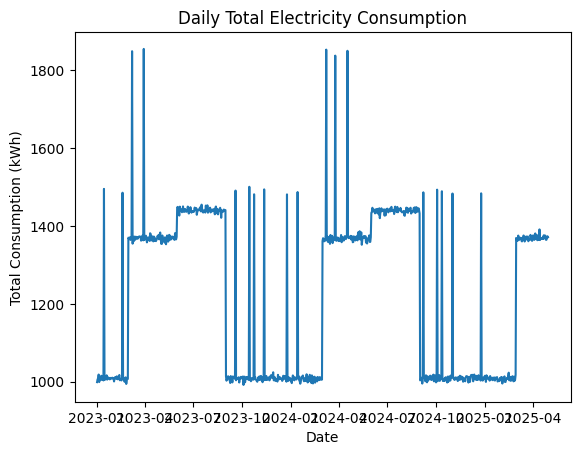

In [23]:
data['Date'] = data['timestamp'].dt.date

daily_consumption = data.groupby('Date')['total_consumption'].sum()

plt.figure()
daily_consumption.plot()
plt.xlabel("Date")
plt.ylabel("Total Consumption (kWh)")
plt.title("Daily Total Electricity Consumption")
plt.show()


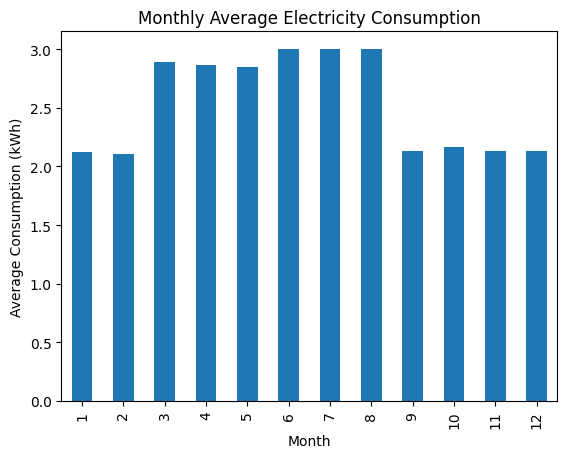

In [24]:
data['Month'] = data['timestamp'].dt.month

monthly_consumption = data.groupby('Month')['total_consumption'].mean()

plt.figure()
monthly_consumption.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Average Consumption (kWh)")
plt.title("Monthly Average Electricity Consumption")
plt.show()


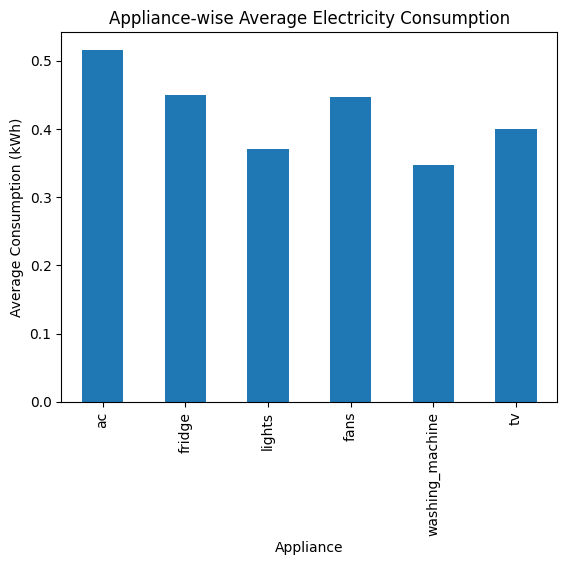

In [25]:
appliance_sum = data[appliance_cols].mean()

plt.figure()
appliance_sum.plot(kind='bar')
plt.xlabel("Appliance")
plt.ylabel("Average Consumption (kWh)")
plt.title("Appliance-wise Average Electricity Consumption")
plt.show()


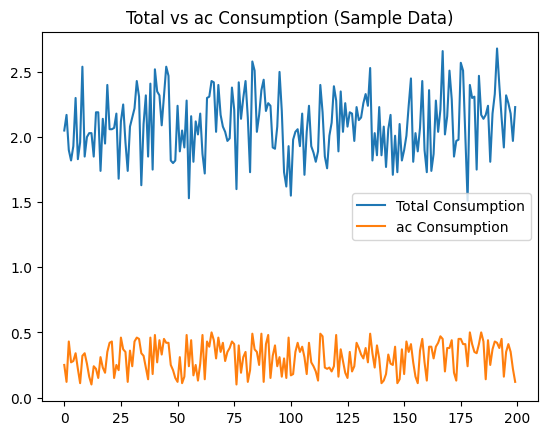

In [26]:
plt.figure()
plt.plot(data['total_consumption'].values[:200], label='Total Consumption')
plt.plot(data['ac'].values[:200], label='ac Consumption')
plt.legend()
plt.title("Total vs ac Consumption (Sample Data)")
plt.show()

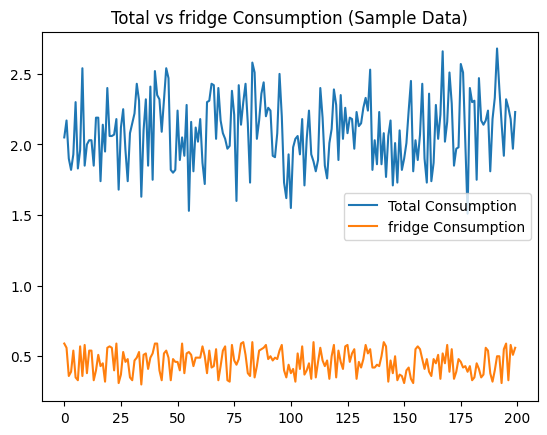

In [27]:
plt.figure()
plt.plot(data['total_consumption'].values[:200], label='Total Consumption')
plt.plot(data['fridge'].values[:200], label='fridge Consumption')
plt.legend()
plt.title("Total vs fridge Consumption (Sample Data)")
plt.show()

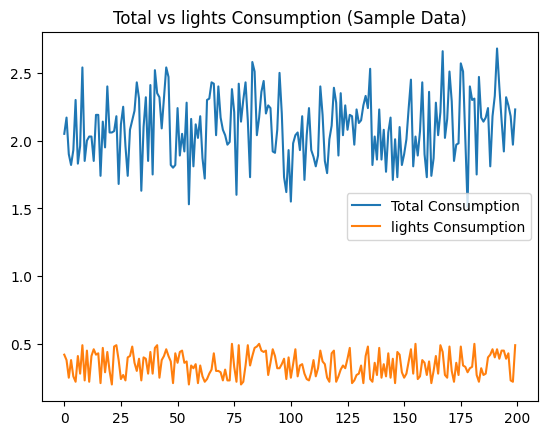

In [28]:
plt.figure()
plt.plot(data['total_consumption'].values[:200], label='Total Consumption')
plt.plot(data['lights'].values[:200], label='lights Consumption')
plt.legend()
plt.title("Total vs lights Consumption (Sample Data)")
plt.show()

In [29]:
import os
import pickle

# check trained model
print(model)

# force correct folder
SAVE_PATH = r"C:\Users\Harika karni\Documents\ml_project\model"
os.makedirs(SAVE_PATH, exist_ok=True)

MODEL_FILE = os.path.join(SAVE_PATH, "model.pkl")

with open(MODEL_FILE, "wb") as f:
    pickle.dump(model, f)

print("Model saved at:", MODEL_FILE)

RandomForestRegressor(random_state=42)
Model saved at: C:\Users\Harika karni\Documents\ml_project\model\model.pkl
